# Local testing for Vertex Cover algorithms

Fix for NotImplementedError for notebook in Python3.8
https://stackoverflow.com/questions/58422817/jupyter-notebook-with-python-3-8-notimplementederror

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from networkx.algorithms.approximation.vertex_cover import min_weighted_vertex_cover
from vertex_cover import *

# Generating graphs

In [2]:
# Generate classic small graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

In [3]:
# Generate social networks
florentine = nx.generators.social.florentine_families_graph()

In [4]:
# Constructively generate classic graphs
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

In [5]:
# Generate stochastic graphs
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

NetworkX random graph generators worth testing with:
- Community
- Social Networks
- Random Graphs

# Drawing graphs

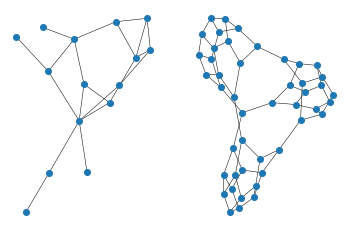

In [6]:
options = {
#     'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.5,
}

plt.subplot(121)
nx.draw(florentine, **options)
plt.subplot(122)
nx.draw(tutte, **options)

# Testing VC

In [32]:
graph = florentine
k = 12

functions = [
    {
        "name": "NetworkX VC",
        "func": min_weighted_vertex_cover
    },
    {
        "name": "Brute Force",
        "func": vertex_cover_brute_force,
    },
    {
        "name": "Kernelization",
        "func": vertex_cover_kernelization,
    },
#     {
#         "name": "Branching 2^k Pass",
#         "func": vertex_cover_branching_2k_pass,
#     },
#     {
#         "name": "Branching 1 Pass",
#         "func": vertex_cover_branching_1_pass,
#     },
#     {
#         "name": "Iterative Compression",
#         "func": vertex_cover_iterative_compression,
#     },
]

# for function in functions:
#     print(function["name"])
#     func = function["func"]
    
#     if function["name"] != "NetworkX VC":
#         print(f"Result: {func(graph, k)}\n")
#     else:
#         print(f"Result: {func(graph)}\n")

len(list(powerset(list(florentine.nodes), 5)))
len(florentine.nodes)

15

In [ ]:
%timeit -n 50 vertex_cover_brute_force(florentine, k)
%timeit -n 50 vertex_cover_kernelization(tutte, k)

## Kernelization

In [9]:
vc = vertex_cover_kernelization(graph, k)
print(vc)

{'Guadagni', 'Peruzzi', 'Salviati', 'Strozzi', 'Ridolfi', 'Castellani', 'Medici', 'Albizzi'}


## Branching

In [11]:
vc = vertex_cover_branching_2k_pass(graph, k)
print(vc)

IndexError: list index out of range